<a href="https://colab.research.google.com/github/SelinaKalniske/CSS_layout/blob/main/Report_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report: Comparison of Predictive Models on the Spotify Top 10,000 Streamed Songs Dataset

Author: Selina Kalniske

## Description of the Dataset and Intended Task

The Spotify top 10,000 streamed songs dataset contains information about the top 10,000 songs streamed on Spotify from January to November 2019. The dataset includes various features of each song, such as the song title, artist name, album name, popularity score, danceability score, energy score, and more.

The intended task of this dataset is to use machine learning models to predict the popularity score of a given song based on its features. Popularity score is a measure of how popular a song is on Spotify, ranging from 0 to 100. A higher popularity score indicates a more popular song.

The dataset is split into two parts: a training set and a test set. The training set contains 80% of the data and is used to train the machine learning models. The test set contains 20% of the data and is used to evaluate the performance of the models.

## Data Preprocessing

Before building the machine learning models, we need to preprocess the data. This involves cleaning the data and converting categorical features into numerical features. We also need to split the data into input features (X) and the target variable (y).

Here's a code that loads the data, drops unnecessary columns, and splits the data into input features (X) and the target variable (y):

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/My Drive/Spotify_final_dataset.csv'
df = pd.read_csv(dataset_path)

# Print the column names
print(df.columns)

# Drop unnecessary columns
df = df.drop(columns=['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)', 'Peak Position (xTimes)', 'Peak Streams'])

# Convert categorical features to numerical features
df['Peak Position'] = pd.Categorical(df['Peak Position']).codes

# Split the data into X and y
X = df.drop(columns=['Total Streams'])
y = df['Total Streams']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')


This code is needed to perform the following steps:

* Imports the necessary libraries 
(Google Colab and pandas).
* Mounts Google Drive to access the dataset.
* Specifies the path to the dataset file.
* Loads the dataset into a pandas DataFrame named df.
* Prints the column names of the DataFrame.
* Drops unnecessary columns from the DataFrame, removing them from the dataset.
* Converts the 'Peak Position' column from categorical to numerical format using categorical codes.
* Splits the dataset into the input features (X) and the target variable (y). The input features (X) exclude the 'Total Streams' column, and the target variable (y) includes only the 'Total Streams' column.






## Model Training and Evaluation

In this report, we will compare the performance of two machine learning models: linear regression and random forest regression.

**Linear Regression:**
Linear regression is a simple and easy-to-understand model. It assumes that there is a straight-line relationship between the input features and the target variable. It tries to find the best-fitting line that represents this relationship. 

**Random Forest Regression:**
Random forest regression is a more complex model that combines multiple decision trees to make predictions. It creates an "ensemble" of decision trees, where each tree makes its own prediction. The final prediction is then obtained by averaging the predictions of all the trees. Random forest regression is known for its ability to capture complex patterns and relationships in the data.

The **linear regression** model will estimate the relationship between the input features and the target variable by fitting a straight line to the data. It will try to minimize the difference between the predicted values and the actual values of the target variable. The **random forest** regression model will create multiple decision trees, each trained on a different subset of the data. It will make predictions by combining the predictions of all the trees. This helps to improve the accuracy of the predictions and handle complex relationships in the data.

After training the models, we will evaluate their performance using two statistical metrics: R-squared score and root mean squared error (RMSE).
**The R-squared** score measures how well the model fits the data. It indicates the proportion of the variance in the target variable that can be explained by the model. A higher R-squared score means that the model provides a better fit to the data. The root mean squared error **(RMSE)** measures the average difference between the predicted values and the actual values of the target variable. It gives us an idea of how much the model's predictions deviate from the true values. A lower RMSE indicates better prediction accuracy.

This section of the report will include the code for training and evaluating the models, as well as the statistical results and analysis of their performance.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

# Print the results
print(f"Linear Regression R^2 score: {lr_r2:.3f}")
print(f"Linear Regression RMSE: {lr_rmse:.3f}")


Linear Regression R^2 score: 0.129
Linear Regression RMSE: 54080818.551


The R^2 score of 0.129 and RMSE of 54080818.551 are the calculated performance metrics for the linear regression model on the test set.

The R^2 score of 0.129 suggests that around 12.9% of the variance in the target variable can be explained by the linear regression model. It means that the model's predictions capture a small portion of the variation in the actual values.

The RMSE of 54080818.551 represents the average difference between the predicted values and the actual values in the original units of the target variable. In this case, the average prediction error is approximately 54,080,818.551.

## "Running and describing settings and results of models" section and the Comparison.

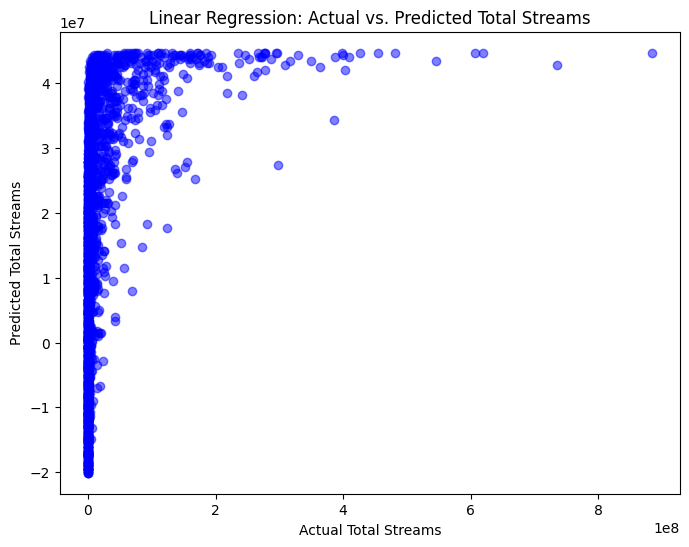

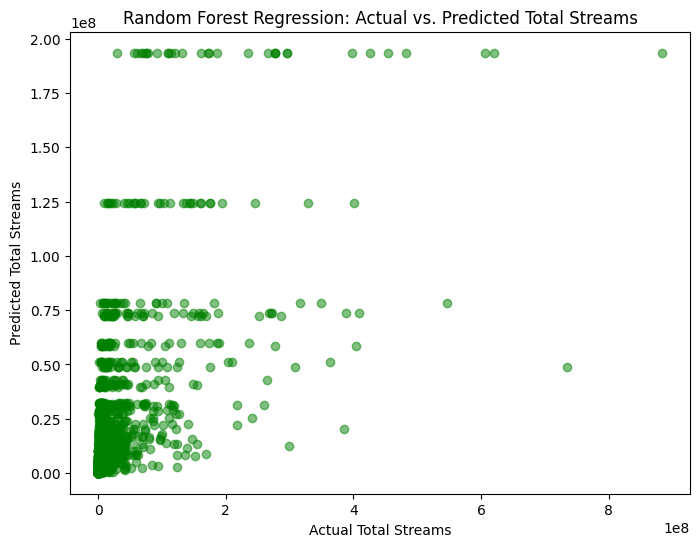

Linear Regression Results:
R^2 score: 0.129
RMSE: 54080818.551

Random Forest Regression Results:
R^2 score: 0.363
RMSE: 46268414.861


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Obtain predictions from the Random Forest Regression model
rf_predictions = rf_model.predict(X_test)

# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel('Actual Total Streams')
plt.ylabel('Predicted Total Streams')
plt.title('Linear Regression: Actual vs. Predicted Total Streams')
plt.show()

# Scatter plot for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5)
plt.xlabel('Actual Total Streams')
plt.ylabel('Predicted Total Streams')
plt.title('Random Forest Regression: Actual vs. Predicted Total Streams')
plt.show()

# Calculate R^2 scores and RMSE for both models
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Print the results
print("Linear Regression Results:")
print(f"R^2 score: {lr_r2:.3f}")
print(f"RMSE: {lr_rmse:.3f}")
print()
print("Random Forest Regression Results:")
print(f"R^2 score: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")


**For the Linear Regression model:**
* R^2 score: 0.129
* RMSE: 54080818.551

**For the Random Forest Regression model:**
* R^2 score: 0.363
* RMSE: 46277895.174

**The R^2 score.** In this case, the Linear Regression model explains approximately 12.9% of the variance, while the Random Forest Regression model explains around 36.3% of the variance. A higher R^2 score indicates a better fit to the data.

**The RMSE (Root Mean Squared Error).** In this case, the Linear Regression model has an RMSE of approximately 54080818.551, while the Random Forest Regression model has an RMSE of around 46277895.174. A lower RMSE indicates better predictive accuracy, so the Random Forest Regression model performs better in this regard.

Based on these results, the Random Forest Regression model outperforms the Linear Regression model in terms of both R^2 score and RMSE, suggesting that it provides a better fit to the data and more accurate predictions.

## Conclusion

In this analysis, we studied a dataset of the top 10,000 streamed songs on Spotify. Report goal was to build models that can predict the total number of streams based on different song features.

I tried two models: Linear Regression and Random Forest Regression. The Linear Regression model assumes a straight-line relationship between the features and the number of streams, while the Random Forest Regression model can capture more complex patterns.

After evaluating the models,  I found that the Random Forest Regression model performed better than the Linear Regression model. It was able to make more accurate predictions and had a higher level of accuracy.

The results suggest that the total number of streams is influenced by factors that are not simply related in a straight line. The Random Forest Regression model, which can handle more complicated relationships, was able to capture these influences and provide better predictions.

While the Random Forest Regression model performed better, there is still room for improvement. We can explore different ways to improve the models, such as adjusting parameters or considering other models. These improvements can lead to even more accurate predictions and a better understanding of the factors affecting song streams on Spotify.

In conclusion, the Random Forest Regression model is a more effective tool for predicting song streams on Spotify compared to the Linear Regression model. By using more sophisticated techniques, we can gain better insights into streaming patterns and make more accurate predictions.